# Validación Cruzada (Cross-Validation)

In [1]:
### GridSearchCV

La **validación cruzada** o **cross-validation** es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba. Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones. Se utiliza en entornos donde el objetivo principal es la predicción y se quiere estimar la precisión de un modelo que se llevará a cabo a la práctica.1​ Es una técnica muy utilizada en proyectos de inteligencia artificial para validar modelos generados.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [8]:
df_titanic = pd.read_csv("./titanic1.csv")
df_titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


### LIMPIEZA DE DATOS

In [10]:
df_num = df_titanic.select_dtypes(include="number") # Nos quedamos con todos los datos númericos
df_num.drop(columns="PassengerId", inplace = True) # Modifica directamete el DF. # Vamos a quietar PassengerId (que también es numérica) por que es RUIDO, no nos aporta nada

df_num.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


### "Survived" será la variable objetivo

In [11]:
X = df_num.drop(columns="Survived")
y = df_num["Survived"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
dtc_model = DecisionTreeClassifier(random_state = 0)

In [14]:
dtc_model.fit(X_train, y_train) #  NOS VA DAR ERROR porque hay valores NaN en el df

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [15]:
# Podemos sustituir los NaN, pero no es aconsejable

# Seria más aconsejable poner la media en cada NaN

In [16]:
# Vamos a hacer .info() para buscar donde tenemos datos NaN
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


Observamos que en AGE nos faltan los datos, por lo que los NaN están ahí.


### Vamos a sustituir los NaN por la media de edad.

In [18]:
X["Age"].fillna(X["Age"].mean(), inplace = True)
dtc_model.fit(X_train, y_train) # Algún error? CUIDADO, NOS VA DAR ERROR. Tenemos que VOLVER A ENTRENAR el X_train y el y_train

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
dtc_model = DecisionTreeClassifier(random_state = 0)

In [20]:
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
dtc_model.score(X_test, y_test)

0.6256983240223464

### Vamos a probar ahora fijando algunos parámetros del modelo

In [25]:
dtc_model = DecisionTreeClassifier(max_depth = 3, random_state = 0) # Le vamos a meter el mas_depth de 3. Buscar en ChatGPT info
dtc_model.fit(X_train, y_train)
dtc_model.score(X_test, y_test)

0.7430167597765364

### Vamos a probar varios valores

In [35]:
# Vamos a crear una LISTA
lista_max_depth = range(3, 10, 3)

for md in lista_max_depth:
    dtc_model = DecisionTreeClassifier(max_depth = md, random_state = 0)
    dtc_model.fit(X_train, y_train)
    print(f"max_depth {md} --> score: {dtc_model.score(X_test, y_test)}")

max_depth 3 --> score: 0.7430167597765364
max_depth 6 --> score: 0.6927374301675978
max_depth 9 --> score: 0.6703910614525139


### Vamos a probar con otro parámetro ded modelo

    Vamos a usar otro parámetro. En la celda anterior hemos creado una lista MAX DEPTH. En esta usaremos una lista MIN SAMPLES LEAF. Prestar atención al parámetro max_depth (md) dentro del modelo DecisionTreeClassifier por el min_samples_leaf (msl)

In [39]:
# Muestras mínimas para que un nodo se divida

# Vamos a crear una NUEVA LISTA
lista_min_samples_leaf = range(5, 96, 10)

for msl in lista_max_depth:
    dtc_model = DecisionTreeClassifier(min_samples_leaf = msl, random_state = 0) # En este caso hemos cambiado el parámetro. En la celda anterior 
    dtc_model.fit(X_train, y_train)
    print(f"max_depth {msl} --> score: {dtc_model.score(X_test, y_test)}")

max_depth 5 --> score: 0.664804469273743
max_depth 15 --> score: 0.7039106145251397
max_depth 25 --> score: 0.7206703910614525
max_depth 35 --> score: 0.7206703910614525
max_depth 45 --> score: 0.7206703910614525
max_depth 55 --> score: 0.7486033519553073
max_depth 65 --> score: 0.7374301675977654
max_depth 75 --> score: 0.7430167597765364
max_depth 85 --> score: 0.7318435754189944
max_depth 95 --> score: 0.7262569832402235


In [45]:
lista_max_depth = range(3, 10, 3)
lista_min_samples_leaf = range(5, 96, 10)

for md in lista_max_depth:
    for msl in lista_min_samples_leaf:
        dtc_model = DecisionTreeClassifier(min_samples_leaf = msl, max_depth = md, random_state = 0)
        dtc_model.fit(X_train, y_train)
        print(f"min_samples_leaf: {msl}, max_depth: {md} \\ --> {dtc_model.score(X_test, y_test)}")

min_samples_leaf: 5, max_depth: 3         --> 0.7430167597765364
min_samples_leaf: 15, max_depth: 3         --> 0.7374301675977654
min_samples_leaf: 25, max_depth: 3         --> 0.7374301675977654
min_samples_leaf: 35, max_depth: 3         --> 0.7318435754189944
min_samples_leaf: 45, max_depth: 3         --> 0.7318435754189944
min_samples_leaf: 55, max_depth: 3         --> 0.7318435754189944
min_samples_leaf: 65, max_depth: 3         --> 0.7318435754189944
min_samples_leaf: 75, max_depth: 3         --> 0.7318435754189944
min_samples_leaf: 85, max_depth: 3         --> 0.7318435754189944
min_samples_leaf: 95, max_depth: 3         --> 0.7262569832402235
min_samples_leaf: 5, max_depth: 6         --> 0.6927374301675978
min_samples_leaf: 15, max_depth: 6         --> 0.7206703910614525
min_samples_leaf: 25, max_depth: 6         --> 0.7206703910614525
min_samples_leaf: 35, max_depth: 6         --> 0.7206703910614525
min_samples_leaf: 45, max_depth: 6         --> 0.7206703910614525
min_samples_

### El mejor modelo se consigue para min_samples_leaf = 55, max_depth = 6

In [47]:
# VAMOS A CREAR UN NUEVO MODELO CON ESOS PARÁMETROS

dtc_model = DecisionTreeClassifier(min_samples_leaf = 55, max_depth = 6, random_state = 0)
dtc_model.fit(X_train, y_train)
dtc_model.score(X_test, y_test)

0.7486033519553073

# GridSearchCV

### La clase GridSearch nos permite hacer lo mismo

In [50]:
lista_max_depth = range(3, 10, 3)
lista_min_samples_leaf = range(5, 96, 10)
parametros = {"max_depth": lista_max_depth, "min_samples_leaf": lista_min_samples_leaf}
dtc_model2 = DecisionTreeClassifier(random_state = 0)
grid_search = GridSearchCV(dtc_model2, parametros)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(3, 10, 3),
                         'min_samples_leaf': range(5, 96, 10)})

In [51]:
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 25}

In [54]:
grid_search.best_estimator_.score(X_test, y_test)

0.7206703910614525

In [55]:
# COMPROVACIÓN del GRIDSEARCH: Creamos un nuevo modelo y lo entrenamos para ver si coincide
dtc_model = DecisionTreeClassifier(min_samples_leaf = 25, max_depth = 9, random_state = 0)
dtc_model.fit(X_train, y_train)
dtc_model.score(X_test, y_test)

0.7206703910614525

# Importancia de las variables

In [57]:
dtc_model.feature_importances_

array([0.36638247, 0.26396013, 0.02924061, 0.        , 0.3404168 ])

In [58]:
dtc_model.feature_names_in_

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype=object)

Observamos que la columana PARCH tiene importancia = 0, es decir que podemos borralo.

<BarContainer object of 5 artists>

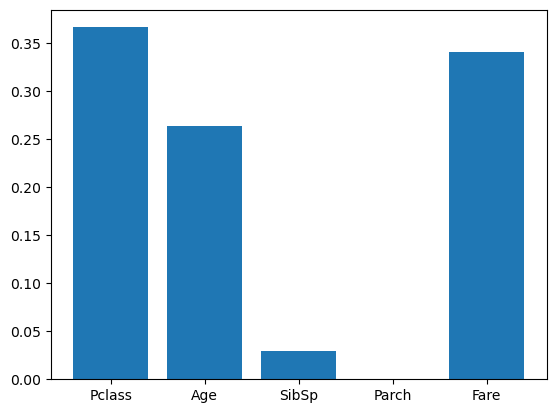

In [62]:
plt.bar(dtc_model.feature_names_in_, dtc_model.feature_importances_)

Vemos que SibSp y Parch no son importantes, se podrian eleminar al entrenar el modelo. Lo que este por debajo del 0.05 "príamos casi" eliminarlos

# Ejercicio 2

In [93]:
df_titanic2 = pd.read_csv("./titanic1.csv")
df_titanic2.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [94]:
df_num2 = df_titanic2.select_dtypes(include="number") # Nos quedamos con todos los datos númericos
df_num2.drop(columns= "PassengerId", inplace = True) # Modifica directamete el DF. # Vamos a quietar PassengerId (que también es numérica) por que es RUIDO, no nos aporta nada
df_num2.drop(columns= "SibSp", inplace = True) # Modifica directamete el DF. # Vamos a quietar PassengerId (que también es numérica) por que es RUIDO, no nos aporta nada
df_num2.drop(columns= "Parch", inplace = True) # Modifica directamete el DF. # Vamos a quietar PassengerId (que también es numérica) por que es RUIDO, no nos aporta nada

df_num2.head(2)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833


In [95]:
X = df_num2.drop(columns="Survived")
y = df_num2["Survived"]

In [96]:
X["Age"].fillna(X["Age"].mean(), inplace = True)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
dtc_model2 = DecisionTreeClassifier(random_state = 0)

In [98]:
lista_max_depth = range(3, 10, 3)
lista_min_samples_leaf = range(5, 96, 10)
parametros = {"max_depth": lista_max_depth, "min_samples_leaf": lista_min_samples_leaf}
dtc_model3 = DecisionTreeClassifier(random_state = 0)
grid_search2 = GridSearchCV(dtc_model3, parametros)
grid_search2.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(3, 10, 3),
                         'min_samples_leaf': range(5, 96, 10)})

In [99]:
grid_search2.best_params_

{'max_depth': 9, 'min_samples_leaf': 25}

In [100]:
grid_search2.best_estimator_.score(X_test, y_test)

0.7206703910614525

In [101]:
# COMPROVACIÓN del GRIDSEARCH: Creamos un nuevo modelo y lo entrenamos para ver si coincide
dtc_model4 = DecisionTreeClassifier(min_samples_leaf = 25, max_depth = 9, random_state = 0)
dtc_model4.fit(X_train, y_train)
dtc_model4.score(X_test, y_test)

0.7206703910614525

### Importancia de las variables

In [102]:
dtc_model4.feature_importances_

array([0.37000263, 0.2728019 , 0.35719547])

In [103]:
dtc_model4.feature_names_in_

array(['Pclass', 'Age', 'Fare'], dtype=object)

<BarContainer object of 3 artists>

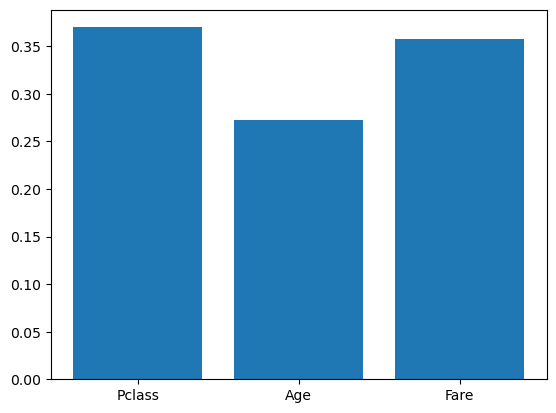

In [105]:
plt.bar(dtc_model4.feature_names_in_, dtc_model4.feature_importances_)

---
---
---

# Mejorando el Modelo

### Vamos a ver si podemos mejorar el modelo introduciendo la variable "Sex

In [106]:
df_titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [108]:
# Vamos a crear una nueva columna "Sex_num"
df_titanic["Sex_num"] = df_titanic["Sex"].map({"male": 0, "female": 1}) # Creamos Columna Sex_num. Sex es texto, pero sex_num la hemos 
df_titanic["Age"].fillna(df_titanic["Age"].mean(), inplace = True)
df_num = df_titanic.select_dtypes(include = "number") # En este caso nos coge la columana Sex_num PORQUE ES NÚMERICA
df_num.drop(columns = "PassengerId", inplace = True) 
df_num.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1


In [109]:
X = df_num.drop(columns = "Survived") # "x" Variables predictoras
y = df_num["Survived"] # "y" es la variable objetivo

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [113]:
lista_max_depth = range(3, 10, 3)
lista_min_samples_leaf = range(5, 96, 10)
parametros = {"max_depth": lista_max_depth, "min_samples_leaf": lista_min_samples_leaf}
dtc_model4 = DecisionTreeClassifier(random_state = 0)
grid_search = GridSearchCV(dtc_model4, parametros)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(3, 10, 3),
                         'min_samples_leaf': range(5, 96, 10)})

In [114]:
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 5}

In [115]:
grid_search.best_estimator_.score(X_test, y_test) # SIEMPRE, para el score 

0.8268156424581006

In [116]:
# COMPROVACIÓN del GRIDSEARCH: Creamos un nuevo modelo y lo entrenamos para ver si coincide
dtc_model5 = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 9, random_state = 0)
dtc_model5.fit(X_train, y_train)
dtc_model5.score(X_test, y_test)

0.8268156424581006

In [117]:
dtc_model5.feature_importances_

array([0.13392371, 0.15613166, 0.0710357 , 0.00744258, 0.15936748,
       0.47209887])

In [119]:
dtc_model5.feature_names_in_

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num'], dtype=object)

<BarContainer object of 6 artists>

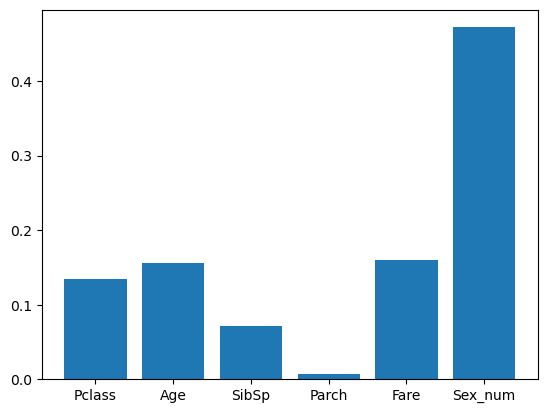

In [120]:
plt.bar(dtc_model5.feature_names_in_, dtc_model5.feature_importances_)

Observamos que la nueva columna es muy importante

---
### Mejorando el modelo

    Hay parámetros que pueden tomar valors en un rango amplio.
    
    En estos ca...

In [124]:
# Vamos a probar varios valores de max_depth de 500 en 500
lista_max_depth = range(1, 9501, 500)

for md in lista_max_depth:
    dtf_m = DecisionTreeClassifier(max_depth = md, random_state = 0)
    dtf_m.fit(X_train, y_train)
    print(f"max_depth {md} --> score: {dtf_m.score(X_test, y_test)}")

max_depth 1 --> score: 0.7877094972067039
max_depth 501 --> score: 0.7932960893854749
max_depth 1001 --> score: 0.7932960893854749
max_depth 1501 --> score: 0.7932960893854749
max_depth 2001 --> score: 0.7932960893854749
max_depth 2501 --> score: 0.7932960893854749
max_depth 3001 --> score: 0.7932960893854749
max_depth 3501 --> score: 0.7932960893854749
max_depth 4001 --> score: 0.7932960893854749
max_depth 4501 --> score: 0.7932960893854749
max_depth 5001 --> score: 0.7932960893854749
max_depth 5501 --> score: 0.7932960893854749
max_depth 6001 --> score: 0.7932960893854749
max_depth 6501 --> score: 0.7932960893854749
max_depth 7001 --> score: 0.7932960893854749
max_depth 7501 --> score: 0.7932960893854749
max_depth 8001 --> score: 0.7932960893854749
max_depth 8501 --> score: 0.7932960893854749
max_depth 9001 --> score: 0.7932960893854749


In [127]:
# Vamos a probar varios valores de max_depth de 100 en 100
lista_max_depth = range(1, 501, 100)

for md in lista_max_depth:
    dtf_m = DecisionTreeClassifier(max_depth = md, random_state = 0)
    dtf_m.fit(X_train, y_train)
    print(f"max_depth {md} --> score: {dtf_m.score(X_test, y_test)}")

max_depth 1 --> score: 0.7877094972067039
max_depth 101 --> score: 0.7932960893854749
max_depth 201 --> score: 0.7932960893854749
max_depth 301 --> score: 0.7932960893854749
max_depth 401 --> score: 0.7932960893854749


In [129]:
# Vamos a probar varios valores de max_depth de 20 en 20
lista_max_depth = range(1, 101, 20)

for md in lista_max_depth:
    dtf_m = DecisionTreeClassifier(max_depth = md, random_state = 0)
    dtf_m.fit(X_train, y_train)
    print(f"max_depth {md} --> score: {dtf_m.score(X_test, y_test)}")

max_depth 1 --> score: 0.7877094972067039
max_depth 21 --> score: 0.7932960893854749
max_depth 41 --> score: 0.7932960893854749
max_depth 61 --> score: 0.7932960893854749
max_depth 81 --> score: 0.7932960893854749


In [131]:
# Vamos a probar varios valores de max_depth de 5 en 5
lista_max_depth = range(1, 22, 5)

for md in lista_max_depth:
    dtf_m = DecisionTreeClassifier(max_depth = md, random_state = 0)
    dtf_m.fit(X_train, y_train)
    print(f"max_depth {md} --> score: {dtf_m.score(X_test, y_test)}")

max_depth 1 --> score: 0.7877094972067039
max_depth 6 --> score: 0.8268156424581006
max_depth 11 --> score: 0.8100558659217877
max_depth 16 --> score: 0.7932960893854749
max_depth 21 --> score: 0.7932960893854749


In [132]:
# Vamos a probar varios valores de max_depth de 11 en 11
lista_max_depth = range(4, 11, 1)

for md in lista_max_depth:
    dtf_m = DecisionTreeClassifier(max_depth = md, random_state = 0)
    dtf_m.fit(X_train, y_train)
    print(f"max_depth {md} --> score: {dtf_m.score(X_test, y_test)}")

max_depth 4 --> score: 0.8156424581005587
max_depth 5 --> score: 0.8156424581005587
max_depth 6 --> score: 0.8268156424581006
max_depth 7 --> score: 0.8044692737430168
max_depth 8 --> score: 0.7932960893854749
max_depth 9 --> score: 0.7932960893854749
max_depth 10 --> score: 0.8156424581005587


Podríamos meter una "lista_max_depth = range(4, 11, 1)" a "GridSearchCv" para combinar con otro parámetro

# EJERCICIO
    Hacer un buclue que vaya probando con "DecisionTreeClassifier" los distitios rangos "lista_max_drpth" vistos previamente (o similares), y los vaya modificando hasta llegar al la solución final vista (o similar).

    Hacer lo mismo para el parámetro "min_samples_leaf", y una vez se hayan excogido los rangos adecuados de "lista_max_depth" y "min_samples_leaf", aplicarlos a "GridSearchCV" para obtener la combinación de parámetros que nos proporcione el máximo "score".

In [145]:
lista_max_depth = range(1, 9501, 500)
lista_max_depth2 = range(1, 501, 100)
lista_max_depth3 = range(1, 101, 20)
lista_max_depth4 = range(1, 22, 5)
lista_max_depth5 = range(4, 11, 1)

for md in (lista_max_depth):
        
    dtf_m = DecisionTreeClassifier(max_depth = md, random_state = 0)
    dtf_m.fit(X_train, y_train)
    print(f"max_depth {md} --> score: {dtf_m.score(X_test, y_test)}")

TypeError: 'float' object is not iterable

In [148]:
# Rangos para lista_max_depth
rangos = [range(1, 9501, 500), range(1, 501, 100), range(1, 101, 20), range(1, 22, 5), range(4, 11, 1)]

for rango in rangos:
    for lista_max_depth in rango:
        # Crear el clasificador con el valor actual de lista_max_depth
        clf = DecisionTreeClassifier(max_depth=lista_max_depth)
        
        # Realizar alguna acción con el clasificador, por ejemplo, entrenarlo y evaluarlo
        dtf_m = DecisionTreeClassifier(max_depth = md, random_state = 0)
        dtf_m.fit(X_train, y_train)
        # Tu código para entrenar y evaluar el clasificador
        
        # Imprimir el resultado o realizar alguna acción adicional
        print(f"lista_max_depth: {lista_max_depth}, resultado: {dtf_m.score(X_test, y_test)}")

lista_max_depth: 1, resultado: 0.7932960893854749
lista_max_depth: 501, resultado: 0.7932960893854749
lista_max_depth: 1001, resultado: 0.7932960893854749
lista_max_depth: 1501, resultado: 0.7932960893854749
lista_max_depth: 2001, resultado: 0.7932960893854749
lista_max_depth: 2501, resultado: 0.7932960893854749
lista_max_depth: 3001, resultado: 0.7932960893854749
lista_max_depth: 3501, resultado: 0.7932960893854749
lista_max_depth: 4001, resultado: 0.7932960893854749
lista_max_depth: 4501, resultado: 0.7932960893854749
lista_max_depth: 5001, resultado: 0.7932960893854749
lista_max_depth: 5501, resultado: 0.7932960893854749
lista_max_depth: 6001, resultado: 0.7932960893854749
lista_max_depth: 6501, resultado: 0.7932960893854749
lista_max_depth: 7001, resultado: 0.7932960893854749
lista_max_depth: 7501, resultado: 0.7932960893854749
lista_max_depth: 8001, resultado: 0.7932960893854749
lista_max_depth: 8501, resultado: 0.7932960893854749
lista_max_depth: 9001, resultado: 0.79329608938547